# Kmeans clustering Analysis
## Results processing

In [2]:
from pyarrow import feather
import pandas as pd 

users = feather.read_table('../data/features/features.arrow').to_pandas()
results = feather.read_table('../data/clustering/kmeans_predictions.arrow').to_pandas()
df = pd.merge(users, results, on='address', how='left')
df.head(5)

base_path = '../data/clustering/'

for i in range(4):
    filtered_df = df[df['cluster'] == i]
    filtered_df.to_feather(f'{base_path}kmeans_cluster_{i}.feather')

## Description

In [3]:
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ Dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 6876845 │ │ float64     │ 43    │                                                         │
│ │ Number of columns │ 64      │ │ int64       │ 20    │                                                         │
│ └───────────────────┴─────────┘ │ string      │ 1     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ received │  0 │    0 │    1.066 │     20.3 │        0 │        0 │        1 │        1 │    22590 │   █    │  │
│ │ _count   │    │      │          │          │          │          │          │          │          │        │  │
│ │ total_re │  0 │    0 │ 8.419e+5 │ 9.873e+5 │        0 │        0 │  1.01e-1 │ 2.118e-0 │ 1.158e+5 │   █    │  │
│ │ ceived_e │    │      │        2 │        5 │          │          │          │        9 │        9 │        │  │
│ │ th       │    │      │          │          │          │          │          │          │          │        │  │
│ │ sent_cou │  0 │    0 │    1.107 │    27.19 │        0 │        0 │        1 │        1 │    27710 │   █    │  │
│ │ nt       │    │      │          │          │          │          │          │          │          │        │  │
│ │ total_se │  0 │    0 │ 8.419e+5 │ 9.873e+5 │        0 │        0 │ 2.136e-1 │ 3.261e-0 │ 1.158e+5 │   █    │  │
│ │ nt_eth   │    │      │        2 │        5 │          │          │          │        9 │        9 │        │  │
│ │ type_dex │  0 │    0 │   0.1599 │    23.34 │        0 │        0 │        0 │        0 │    35520 │   █    │  │
│ │ type_len │  0 │    0 │  0.07752 │    15.66 │        0 │        0 │        0 │        0 │    37990 │   █    │  │
│ │ ding     │    │      │          │          │          │          │          │          │          │        │  │
│ │ type_sta │  0 │    0 │    1.918 │    30.63 │        0 │        1 │        1 │        2 │    40390 │   █    │  │
│ │ blecoin  │    │      │          │          │          │          │          │          │          │        │  │
│ │ type_yie │  0 │    0 │  0.01791 │    6.341 │        0 │        0 │        0 │        0 │    13560 │   █    │  │
│ │ ld_farmi │    │      │          │          │          │          │          │          │          │        │  │
│ │ ng       │    │      │          │          │          │          │          │          │          │        │  │
│ │ type_nft │  0 │    0 │ 0.000460 │    0.493 │        0 │        0 │        0 │        0 │      994 │   █    │  │
│ │ _fi      │    │      │        4 │          │          │          │          │          │          │        │  │
│ │ curve_da │  0 │    0 │  0.07495 │    23.02 │        0 │        0 │        0 │        0 │    35520 │   █    │  │
│ │ o_count  │    │      │          │          │          │          │          │          │          │        │  │
│ │ aave_cou │  0 │    0 │  0.04736 │    2.568 │        

## Utils

In [4]:
print(df.columns)

Index(['address', 'received_count', 'total_received_eth', 'sent_count',
       'total_sent_eth', 'type_dex', 'type_lending', 'type_stablecoin',
       'type_yield_farming', 'type_nft_fi', 'curve_dao_count', 'aave_count',
       'tether_count', 'uniswap_count', 'maker_count', 'yearn_finance_count',
       'usdc_count', 'dai_count', 'balancer_count', 'harvest_finance_count',
       'nftfi_count', 'protocol_type_diversity', 'protocol_name_diversity',
       'net_flow_eth', 'whale_score', 'min_sent_eth', 'avg_sent_eth',
       'med_sent_eth', 'max_sent_eth', 'std_sent_eth', 'min_sent_gas',
       'avg_sent_gas', 'med_sent_gas', 'max_sent_gas', 'std_sent_gas',
       'avg_gas_efficiency_sent', 'peak_hour_sent', 'peak_count_sent',
       'tx_frequency_sent', 'min_received_eth', 'avg_received_eth',
       'med_received_eth', 'max_received_eth', 'std_received_eth',
       'min_received_gas', 'avg_received_gas', 'med_received_gas',
       'max_received_gas', 'std_received_gas', 'avg_gas_efficie

## Metrics Aggregation in Json Object

In [5]:
import pandas as pd
import json

categories = {
    'tx-activity': [
        'received_count', 'total_received_eth', 'sent_count', 'total_sent_eth'
    ],
    'interaction-types': [
        'type_dex', 'type_lending', 'type_stablecoin', 'type_yield_farming', 'type_nft_fi'
    ],
    'protocols-engagement': [
        'curve_dao_count', 'aave_count', 'tether_count', 'uniswap_count', 'maker_count', 'yearn_finance_count',
        'usdc_count', 'dai_count', 'balancer_count', 'harvest_finance_count', 'nftfi_count'
    ],
    'diversity-and-influence': [
        'protocol_type_diversity', 'protocol_name_diversity', 'net_flow_eth', 'whale_score'
    ],
    'sent-tx-statistics': [
        'min_sent_eth', 'avg_sent_eth', 'med_sent_eth', 'max_sent_eth', 'std_sent_eth', 'min_sent_gas',
        'avg_sent_gas', 'med_sent_gas', 'max_sent_gas', 'std_sent_gas', 'avg_gas_efficiency_sent'
    ],
    'received-tx-statistics': [
        'min_received_eth', 'avg_received_eth', 'med_received_eth', 'max_received_eth', 'std_received_eth', 'min_received_gas',
        'avg_received_gas', 'med_received_gas', 'max_received_gas', 'std_received_gas', 'avg_gas_efficiency_received'
    ],
    'timing-behavior': [
        'peak_hour_sent', 'peak_count_sent', 'tx_frequency_sent',
        'peak_hour_received', 'peak_count_received', 'tx_frequency_received'
    ],
    'market-exposure': [
        'total_volume_exposure', 'total_volatility_exposure',
        'total_gas_exposure', 'total_error_exposure',
        'total_liquidity_exposure', 'total_activity_exposure',
        'total_user_adoption_exposure', 'total_gas_volatility_exposure',
        'total_error_volatility_exposure', 'total_high_value_exposure'
    ],
}

total_addresses = df['address'].nunique()
address_counts = df.groupby('cluster')['address'].nunique()

metrics_by_cluster = df.groupby('cluster')[sum(categories.values(), [])].agg(['mean', 'median', 'std', 'var', 'max', 'min'])

hierarchical_metrics = {
    cluster: {
        'address': int(count),
        'repartition_rate': float(count / total_addresses),
        **{
            category: {
                col: {
                    'mean': float(metrics_by_cluster.loc[cluster, (col, 'mean')]),
                    'max': float(metrics_by_cluster.loc[cluster, (col, 'max')]),
                    'min': float(metrics_by_cluster.loc[cluster, (col, 'min')]),
                    'std': float(metrics_by_cluster.loc[cluster, (col, 'std')]),
                    'var': float(metrics_by_cluster.loc[cluster, (col, 'var')]),
                    'median': float(metrics_by_cluster.loc[cluster, (col, 'median')]),
                }
                for col in cols
            }
            for category, cols in categories.items()
        }
    }
    for cluster, count in address_counts.items()
}

metrics_json = json.dumps(hierarchical_metrics, indent=4)

with open(f'{base_path}kmeans_clusters_metrics.json', 'w') as json_file:
    json_file.write(metrics_json)
    
print(metrics_json)


{
    "0": {
        "address": 2008424,
        "repartition_rate": 0.29205602278370385,
        "tx-activity": {
            "received_count": {
                "mean": 0.0,
                "max": 0.0,
                "min": 0.0,
                "std": 0.0,
                "var": 0.0,
                "median": 0.0
            },
            "total_received_eth": {
                "mean": 0.0,
                "max": 0.0,
                "min": 0.0,
                "std": 0.0,
                "var": 0.0,
                "median": 0.0
            },
            "sent_count": {
                "mean": 1.2348796867593694,
                "max": 2576.0,
                "min": 1.0,
                "std": 5.392558951011803,
                "var": 29.079692040137516,
                "median": 1.0
            },
            "total_sent_eth": {
                "mean": 1826.6399903697613,
                "max": 207817741.25423637,
                "min": 0.0,
                "std": 220586.3196515

## Flatten Metrics

In [6]:
import numpy as np
import json 
hierarchical_metrics = json.loads(metrics_json)

data = {
    'cluster0': {},
    'cluster1': {},
    'cluster2': {},
    'cluster3': {}
}

for cluster, metrics in hierarchical_metrics.items():
    for category, submetrics in metrics.items():
        if category != 'address' and category != 'repartition_rate':
            for variable, stats in submetrics.items():
                for stat, value in stats.items():
                    key = f"{category}_{variable}_{stat}"
                    data[f'cluster{cluster}'][key] = value

df_result = pd.DataFrame(data)
df_result = df_result.astype(np.float64)

df_result['variance'] = df_result.var(axis=1, ddof=0)
df_result['std_dev'] = df_result.std(axis=1, ddof=0)
df_result_sorted = df_result.sort_values(by='std_dev', ascending=False)

df_result.to_csv(f'{base_path}kmeans_clusters_variance.csv')

/Users/zebrary/Dev/projects/github/sorbonne-data-analytics/defi-user-behavior-clustering/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


# Plot results
## Tx-Activity

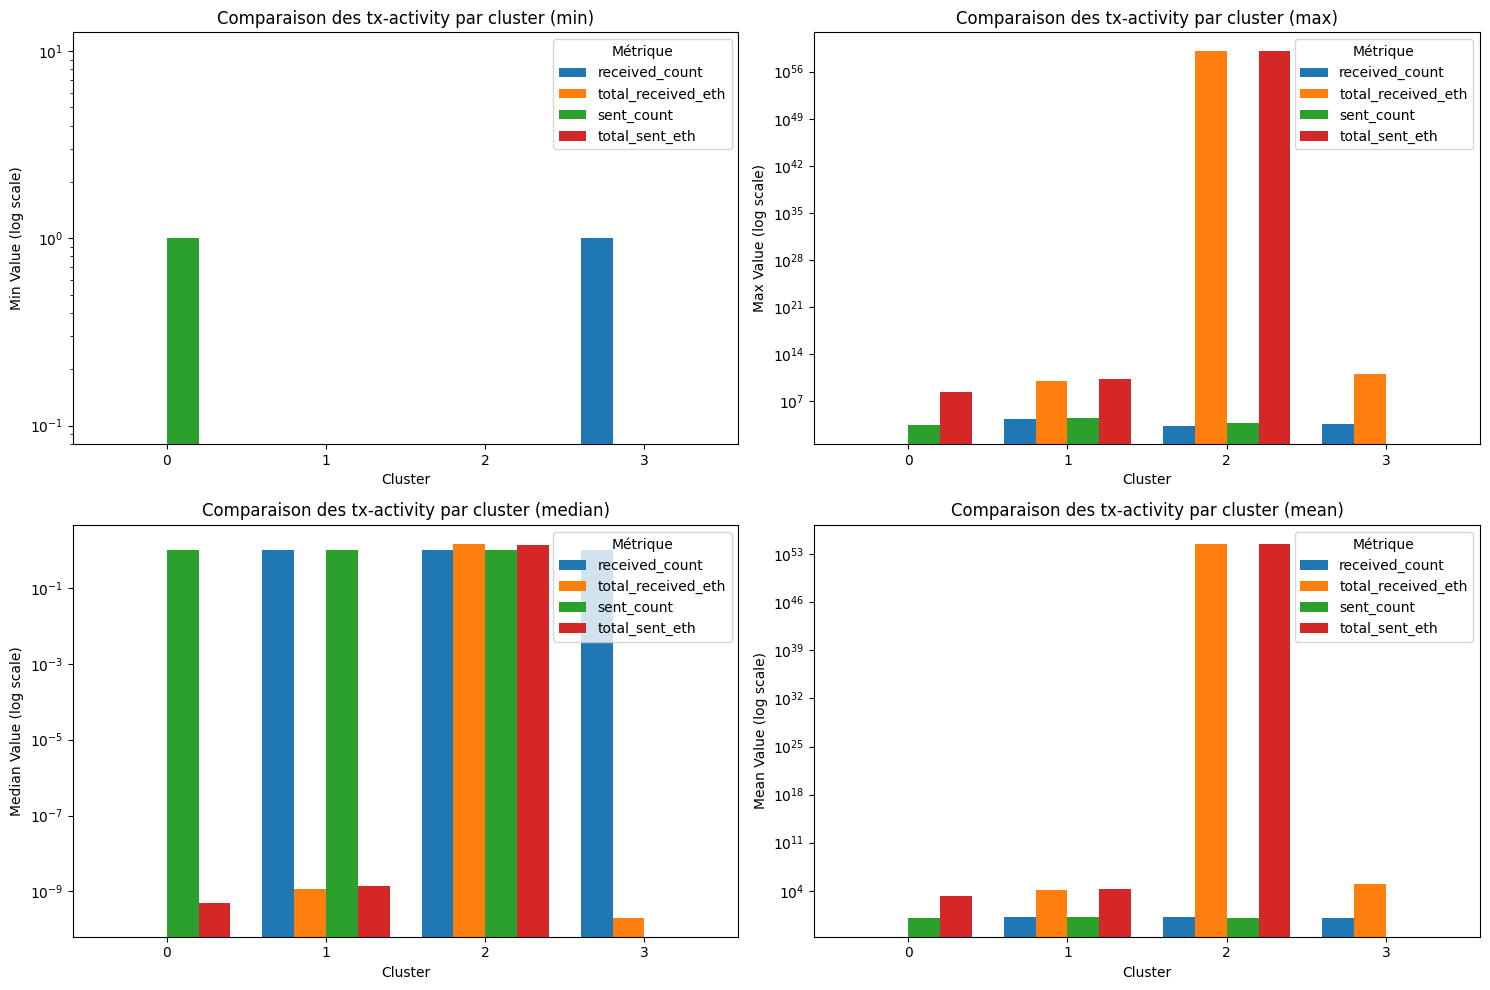

In [15]:
hierarchical_metrics = json.loads(metrics_json)

types = ['min', 'max', 'median', 'mean']

tx_activity_data = {}
for cluster, metrics in hierarchical_metrics.items():
    tx_activity_data[cluster] = {
        'received_count': {t: metrics['tx-activity']['received_count'][t] for t in types},
        'total_received_eth': {t: metrics['tx-activity']['total_received_eth'][t] for t in types},
        'sent_count': {t: metrics['tx-activity']['sent_count'][t] for t in types},
        'total_sent_eth': {t: metrics['tx-activity']['total_sent_eth'][t] for t in types}
    }

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

bar_width = 0.2
index = range(len(tx_activity_data))

for i, stat_type in enumerate(types):
    ax = axes[i]
    for j, metric in enumerate(['received_count', 'total_received_eth', 'sent_count', 'total_sent_eth']):
        values = [tx_activity_data[cluster][metric][stat_type] for cluster in tx_activity_data]
        ax.bar([p + j * bar_width for p in index], values, bar_width, label=metric, log=True)

    ax.set_xlabel('Cluster')
    ax.set_ylabel(f'{stat_type.capitalize()} Value (log scale)')
    ax.set_title(f'Comparaison des tx-activity par cluster ({stat_type})')
    ax.set_xticks([p + 1.5 * bar_width for p in index])
    ax.set_xticklabels(tx_activity_data.keys())
    ax.legend(title='Métrique')

plt.tight_layout()
plt.show()

## Interaction-Types

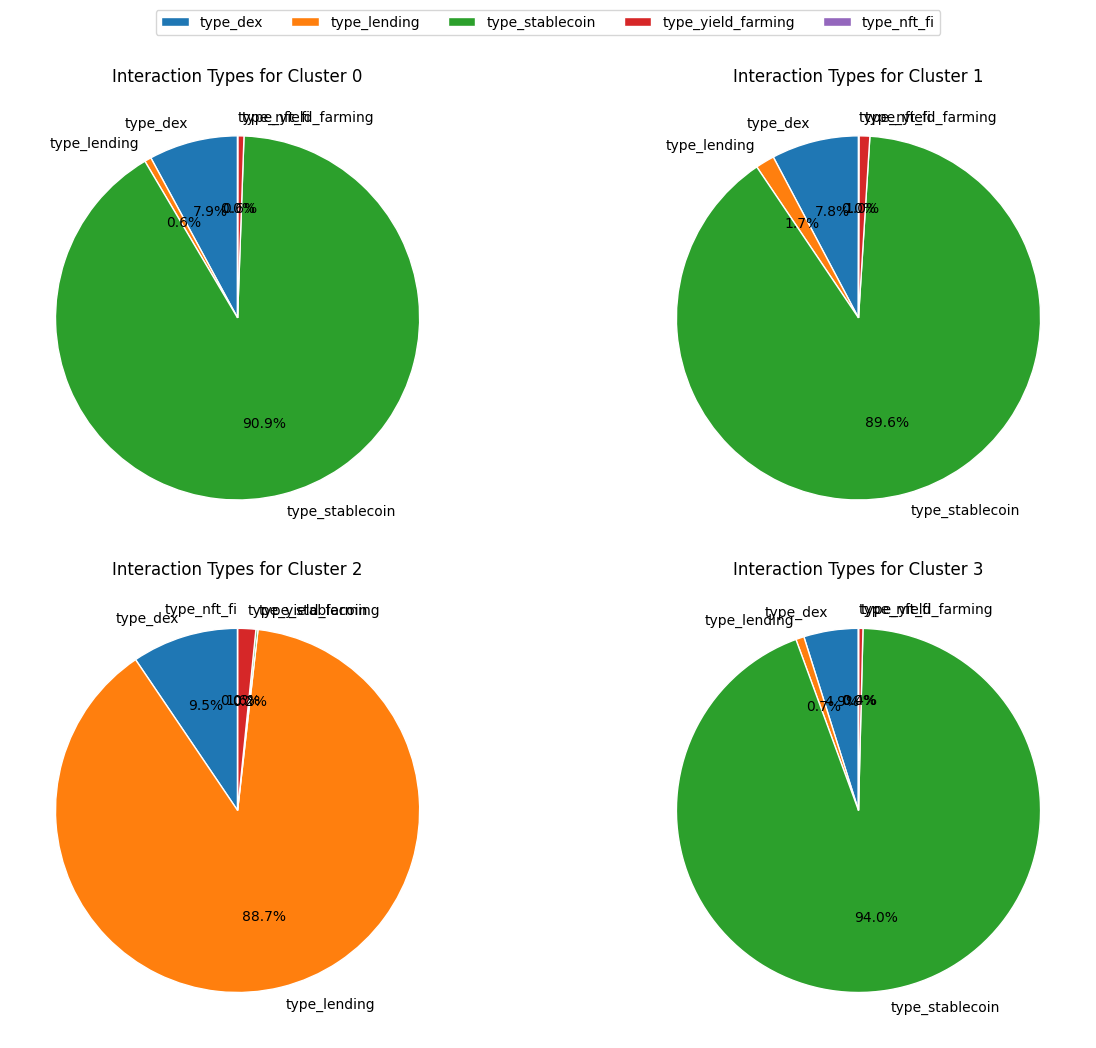

In [27]:
import json
import matplotlib.pyplot as plt

hierarchical_metrics = json.loads(metrics_json)

interaction_types_data = {}
for cluster, metrics in hierarchical_metrics.items():
    interaction_types_data[cluster] = {
        interaction_type: metrics['interaction-types'][interaction_type]['mean']
        for interaction_type in metrics['interaction-types']
    }

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

legend_handles = []

for idx, (cluster, data) in enumerate(interaction_types_data.items()):
    labels = data.keys()
    sizes = data.values()

    wedges, texts, autotexts = axs[idx].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[idx].set_title(f'Interaction Types for Cluster {cluster}')

    for wedge in wedges:
        wedge.set_edgecolor('white')
        legend_handles.append(wedge)

fig.legend(legend_handles, labels, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.05))
plt.tight_layout()
plt.show()

## Protocols-Engagement

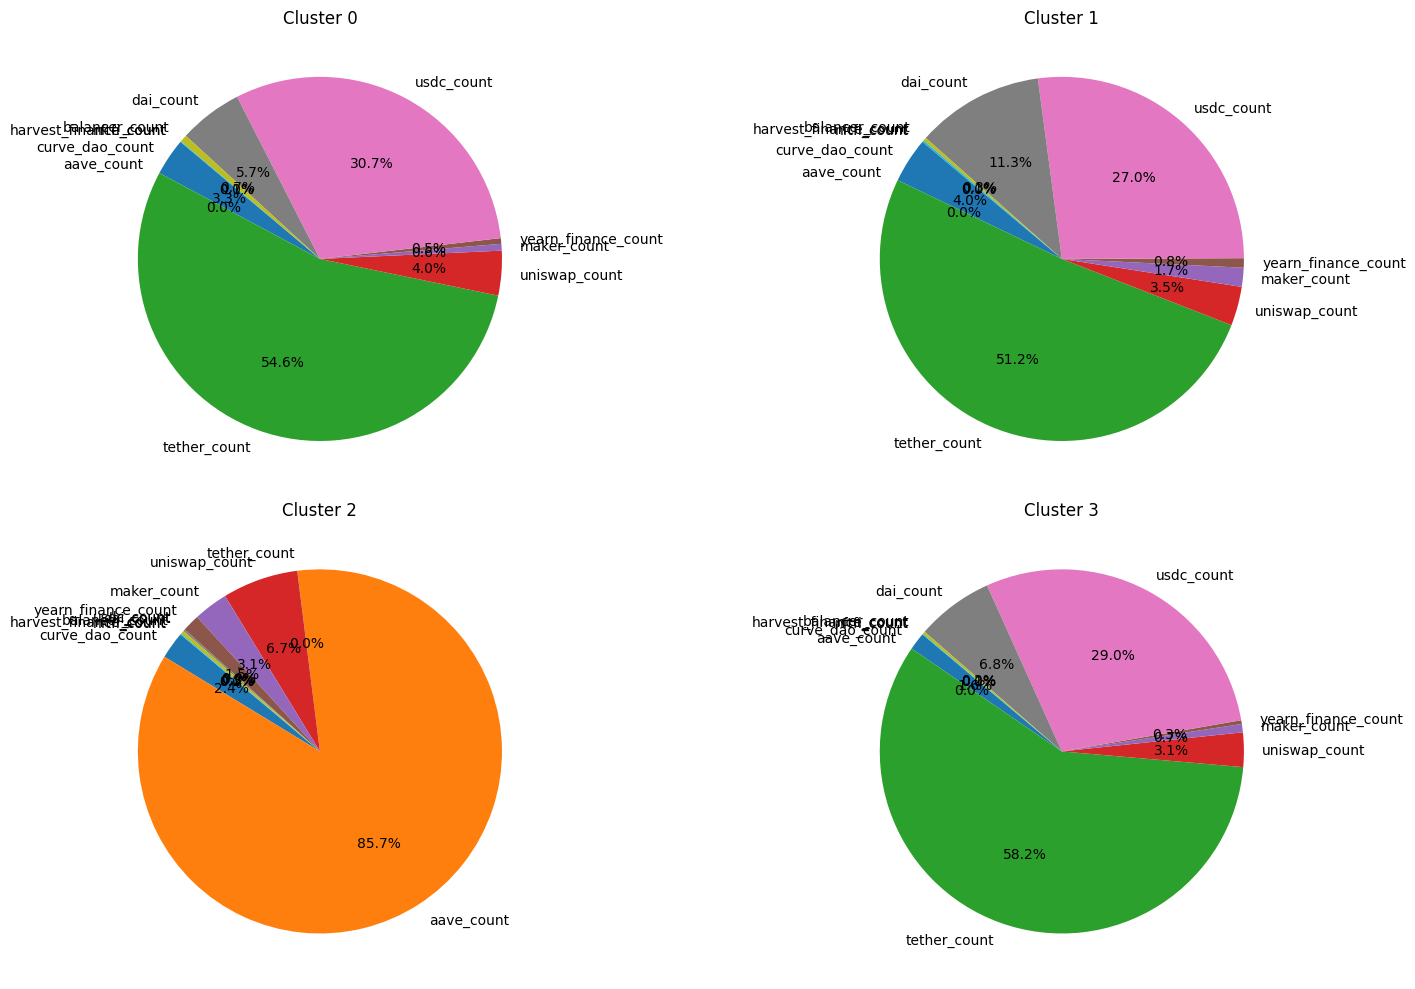

In [23]:
import matplotlib.pyplot as plt

def plot_protocols_engagement_two_columns(hierarchical_metrics):
    clusters = list(hierarchical_metrics.keys())
    num_clusters = len(clusters)
    num_rows = (num_clusters + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows), subplot_kw=dict(aspect="equal"))

    axes = axes.flatten()

    for ax, cluster in zip(axes, clusters):
        protocols_data = hierarchical_metrics[cluster]['protocols-engagement']
        labels = protocols_data.keys()
        means = [protocols_data[label]['mean'] for label in labels]

        ax.pie(means, labels=labels, autopct='%1.1f%%', startangle=140)
        ax.set_title(f'Cluster {cluster}')

    for j in range(num_clusters, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_protocols_engagement_two_columns(hierarchical_metrics)

## Timing-Behavior

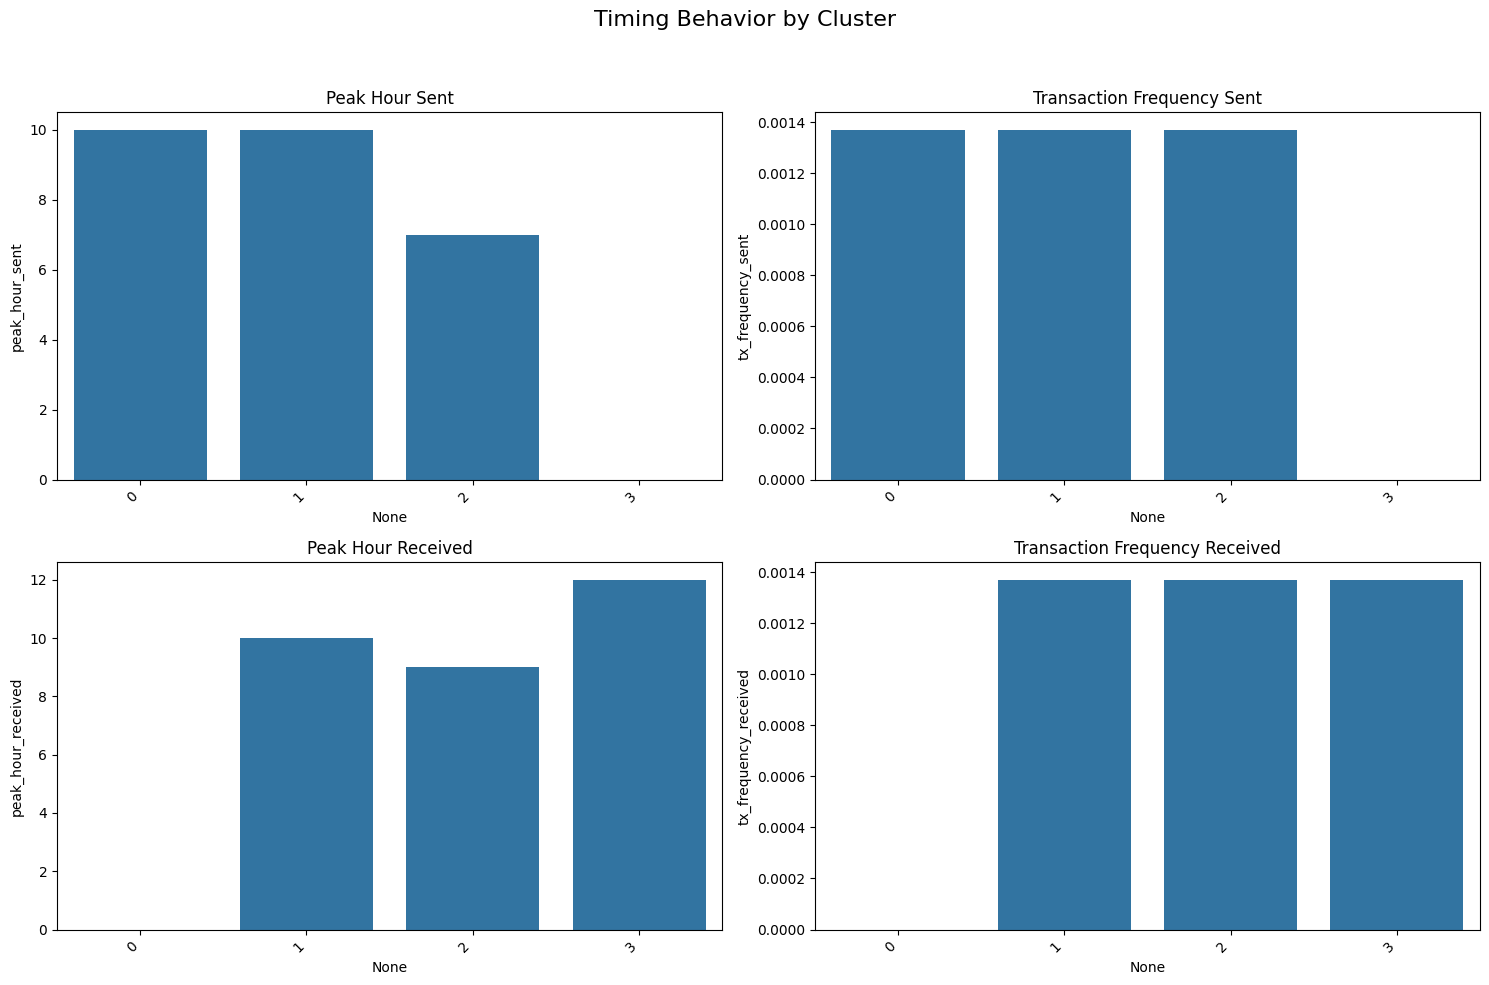

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

hierarchical_metrics = json.loads(metrics_json)

timing_behavior_data = {
    cluster: {
        'peak_hour_sent': metrics['timing-behavior']['peak_hour_sent']['median'],
        'peak_count_sent': metrics['timing-behavior']['peak_count_sent']['median'],
        'tx_frequency_sent': metrics['timing-behavior']['tx_frequency_sent']['median'],
        'peak_hour_received': metrics['timing-behavior']['peak_hour_received']['median'],
        'peak_count_received': metrics['timing-behavior']['peak_count_received']['median'],
        'tx_frequency_received': metrics['timing-behavior']['tx_frequency_received']['median'],
    }
    for cluster, metrics in hierarchical_metrics.items()
}

timing_df = pd.DataFrame.from_dict(timing_behavior_data, orient='index')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Timing Behavior by Cluster', fontsize=16)

# Heure de pointe des transactions envoyées
sns.barplot(x=timing_df.index, y='peak_hour_sent', data=timing_df, ax=axes[0, 0])
axes[0, 0].set_title('Peak Hour Sent')
axes[0, 0].set_xticks(range(len(timing_df.index)))  
axes[0, 0].set_xticklabels(timing_df.index, rotation=45, horizontalalignment='right')

# Fréquence des transactions envoyées
sns.barplot(x=timing_df.index, y='tx_frequency_sent', data=timing_df, ax=axes[0, 1])
axes[0, 1].set_title('Transaction Frequency Sent')
axes[0, 1].set_xticks(range(len(timing_df.index))) 
axes[0, 1].set_xticklabels(timing_df.index, rotation=45, horizontalalignment='right')

# Heure de pointe des transactions reçues
sns.barplot(x=timing_df.index, y='peak_hour_received', data=timing_df, ax=axes[1, 0])
axes[1, 0].set_title('Peak Hour Received')
axes[1, 0].set_xticks(range(len(timing_df.index))) 
axes[1, 0].set_xticklabels(timing_df.index, rotation=45, horizontalalignment='right')

# Fréquence des transactions reçues
sns.barplot(x=timing_df.index, y='tx_frequency_received', data=timing_df, ax=axes[1, 1])
axes[1, 1].set_title('Transaction Frequency Received')
axes[1, 1].set_xticks(range(len(timing_df.index)))
axes[1, 1].set_xticklabels(timing_df.index, rotation=45, horizontalalignment='right')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()